# Neural Networks for Classification

In this notebook we are going to explore the use of Neural Networks for image classification. We are going to use a dataset of small images of clothes and accessories, the Fashion MNIST. You can find more information regarding the dataset here: https://pravarmahajan.github.io/fashion/

Each instance in the dataset consist of an image, in a format similar to the digit images you have seen in the previous homework, and a label. The labels correspond to the type of clothing, as follows:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

Let's first load the required packages.

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV


The following is a function to load the data, that we are going to use later in the notebook.

In [2]:
# helper function to load Fashion MNIST dataset from disk
def load_fashion_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
ID = 2005949
np.random.seed(ID)

Now we load the dataset using the function above.

In [4]:
#load the fashion MNIST dataset and normalize the features so that each value is in [0,1]
X, y = load_fashion_mnist("data")
# rescale the data
X = X / 255.0

Now we split the data into training and test. Make sure that each label is present at least 10 times
in the training set.

In [ ]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rest as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [47 41 66 53 40 55 57 42 47 52]


The following function plots an image and the corresponding label, to be used to inspect the data when needed.

In [ ]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

Now let's test the function above and check few images.

INPUT:


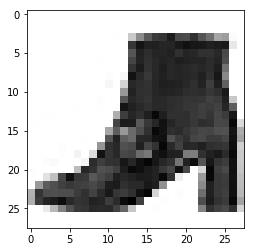

LABEL: 9
INPUT:


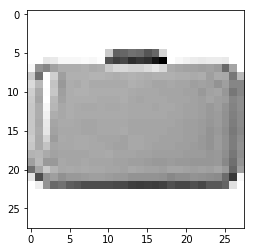

LABEL: 8
INPUT:


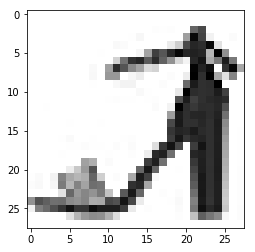

LABEL: 5


In [ ]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,300)

## TO DO 1

Now use a (feed-forward) Neural Network for prediction. Use the multi-layer perceptron (MLP) classifier MLPClassifier(...) in scikit-learn, with the following parameters: max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization parameter for L2 regularization that is used by the MLP in sklearn.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 100. You can evaluate the architectures you chose using the GridSearchCV with a 5-fold cross-validation, and use the results to pick the best architecture. The code below provides some architectures you can use, but you can choose other ones if you prefer.


In [ ]:
#MLPclassifier requires in input the parameter hidden_layer_sizes, that is a tuple specifying the number of 
#neurons in the hidden layers; for example: (10,) means that there is only 1 hidden layer with 10 neurons; 
#(10,50) means that there are 2 hidden layers, the first with 10 neurons, the second with 50 neurons

#these are examples of possible architectures you can test, but feel free to use different architectures! 
hl_parameters = {'hidden_layer_sizes': [(10,), (50,),(190,), (10,10,), (50,50,),(80,80,)]}

mlp = MLPClassifier(hl_parameters,solver='sgd',alpha=1e-4,learning_rate_init=.1,tol=1e-4,max_iter=300,random_state=ID)
mlp_cv = GridSearchCV(mlp,hl_parameters,cv=5) 
print ('RESULTS FOR NN\n')

mlp_cv.fit(X_train,y_train)

print("Best parameters set found:")
#ADD YOUR CODE
print(mlp_cv.best_params_)

print("Score with best parameters:")
#ADD YOUR CODE
print(mlp_cv.best_score_)
print("\nAll scores on the grid:")
#ADD YOUR CODE
print(mlp_cv.cv_results_) 

RESULTS FOR NN



C:\Users\irems\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters set found:
{'hidden_layer_sizes': (190,)}
Score with best parameters:
0.702

All scores on the grid:
{'mean_fit_time': array([0.49223089, 0.86294708, 2.16656957, 0.24916544, 0.61252971,
       0.75889597]), 'std_fit_time': array([0.41521187, 0.52337405, 1.65611688, 0.12197067, 0.15450769,
       0.4600903 ]), 'mean_score_time': array([0.00099268, 0.0013968 , 0.00219707, 0.0009975 , 0.00159583,
       0.00179729]), 'std_score_time': array([6.43571198e-06, 4.88217185e-04, 3.99462155e-04, 3.16297988e-07,
       4.88694713e-04, 3.99777657e-04]), 'param_hidden_layer_sizes': masked_array(data=[(10,), (50,), (190,), (10, 10), (50, 50), (80, 80)],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'hidden_layer_sizes': (10,)}, {'hidden_layer_sizes': (50,)}, {'hidden_layer_sizes': (190,)}, {'hidden_layer_sizes': (10, 10)}, {'hidden_layer_sizes': (50, 50)}, {'hidden_layer_sizes': (80, 80)}], 'split0_test_sco

## TO DO 2

What do you observe for different architectures and their scores? How do the number of layers and their sizes affect the performances?

[ADD YOUR ANSWER HERE]


The mean test score values for different architectures for such different hidden layers : 


[(10,), (50,),(190,), (10,10,), (50,50,),(80,80,)] 


are: 


mean test score array([0.432, 0.61 , 0.702, 0.27 , 0.484, 0.506])
for the architectures with 1 hidden layer, when the neuron size increases, the score also increases with it.
for the architectures with 2 hidden layers, it is almost worse than the results obtained by the 1 hidden layer architectures. For example for a structure with 1 hidden layer and 10 neurons, the score is 0.432 whereas, the structure with 2 hidden layers, and each layer has 10 neurons has the score 0.27 which is the lowest score.
Therefore, for this problem just 1 hidden layer is fairly enough, and the rise of the neuron count affects the score positively.


## TO DO 3

Now get training and test error (according to the initial split) for a NN with best parameters chosen from the cross-validation above (and learning the NN weights from the entire training set). Use verbose=True
in input so to see how loss changes in iterations. (Note that the loss used by the MLPclassifier may be different from the 0-1 loss, also called *accuracy*.)

In [ ]:
#get training and test error for the best NN model from CV

print ('RESULTS FOR NN\n')
mlp = MLPClassifier(hidden_layer_sizes= (190,),solver='sgd',alpha=1e-4,verbose= True, learning_rate_init=.1,tol=1e-4,max_iter = 300, random_state=ID)
mlp.fit(X_train,y_train)

training_error = 1 - mlp.score(X_train,y_train)

test_error = 1 - mlp.score(X_test,y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

RESULTS FOR NN

Iteration 1, loss = 2.15052086
Iteration 2, loss = 1.33449110
Iteration 3, loss = 1.06787308
Iteration 4, loss = 0.84765951
Iteration 5, loss = 0.85836083
Iteration 6, loss = 0.65813466
Iteration 7, loss = 0.52346843
Iteration 8, loss = 0.46503842
Iteration 9, loss = 0.41960070
Iteration 10, loss = 0.57737185
Iteration 11, loss = 0.41012991
Iteration 12, loss = 0.34311953
Iteration 13, loss = 0.31261777
Iteration 14, loss = 0.28498060
Iteration 15, loss = 0.43051103
Iteration 16, loss = 0.26150585
Iteration 17, loss = 0.22650741
Iteration 18, loss = 0.22409444
Iteration 19, loss = 0.19609319
Iteration 20, loss = 0.17858366
Iteration 21, loss = 0.15344393
Iteration 22, loss = 0.16794589
Iteration 23, loss = 0.29071904
Iteration 24, loss = 0.14030321
Iteration 25, loss = 0.13046390
Iteration 26, loss = 0.11873296
Iteration 27, loss = 0.10456873
Iteration 28, loss = 0.11549584
Iteration 29, loss = 0.11699397
Iteration 30, loss = 0.07985623
Iteration 31, loss = 0.09109075
I

## More data 
Now let's do the same but using 10000 (or less if it takes too long on your machine) data points for training. Use the same NN architectures as before, but you can try more if you want!

In [ ]:
X = X[permutation]
y = y[permutation]

m_training = 10000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

print("Labels and frequencies in training dataset: ")
np.unique(y_train, return_counts=True)

Labels and frequencies in training dataset: 


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1027, 1022,  965,  998,  993,  982, 1042, 1015,  976,  980],
       dtype=int64))

## TO DO 4

Now train the NNs with the added data points. Feel free to try more different architectures than before if you want, or less if it takes too much time. You can use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [ ]:
#for NN we try the same architectures as before
hl_parameters = {'hidden_layer_sizes': [(10,), (50,),(150,), (10,10,), (50,50,),(10,10,10,),(50,50,50,)]}
mlp_large =  MLPClassifier(hl_parameters,solver='sgd',verbose = True , alpha=1e-4,learning_rate_init=.1,tol=1e-4,max_iter = 300, random_state=ID)
mlp_large_cv = GridSearchCV(mlp_large,hl_parameters,cv=5) 

print ('RESULTS FOR NN\n')
mlp_large_cv.fit(X_train,y_train)
print("Best parameters set found:")
#ADD YOUR CODE
print(mlp_large_cv.best_params_)

print("Score with best parameters:")
#ADD YOUR CODE
print(mlp_large_cv.best_score_)
print("\nAll scores on the grid:")
#ADD YOUR CODE
print(mlp_large_cv.cv_results_)

RESULTS FOR NN

Iteration 1, loss = 1.30367622
Iteration 2, loss = 0.66332416
Iteration 3, loss = 0.57724339
Iteration 4, loss = 0.53849369
Iteration 5, loss = 0.52042699
Iteration 6, loss = 0.49508390
Iteration 7, loss = 0.46452300
Iteration 8, loss = 0.44278951
Iteration 9, loss = 0.44532067
Iteration 10, loss = 0.43204510
Iteration 11, loss = 0.40570013
Iteration 12, loss = 0.41160376
Iteration 13, loss = 0.39941688
Iteration 14, loss = 0.39980891
Iteration 15, loss = 0.40127121
Iteration 16, loss = 0.40027079
Iteration 17, loss = 0.37822340
Iteration 18, loss = 0.37426787
Iteration 19, loss = 0.36894778
Iteration 20, loss = 0.37101006
Iteration 21, loss = 0.36175082
Iteration 22, loss = 0.37149145
Iteration 23, loss = 0.35944681
Iteration 24, loss = 0.34884607
Iteration 25, loss = 0.33990859
Iteration 26, loss = 0.35993242
Iteration 27, loss = 0.33949461
Iteration 28, loss = 0.33122411
Iteration 29, loss = 0.33570169
Iteration 30, loss = 0.31689888
Iteration 31, loss = 0.33136512
I

C:\Users\irems\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Iteration 1, loss = 0.83513174
Iteration 2, loss = 0.50111212
Iteration 3, loss = 0.43680648
Iteration 4, loss = 0.39700187
Iteration 5, loss = 0.37247301
Iteration 6, loss = 0.34037292
Iteration 7, loss = 0.32229262
Iteration 8, loss = 0.30428526
Iteration 9, loss = 0.28780008
Iteration 10, loss = 0.29013414
Iteration 11, loss = 0.27096176
Iteration 12, loss = 0.26436476
Iteration 13, loss = 0.23992585
Iteration 14, loss = 0.24076229
Iteration 15, loss = 0.22423414
Iteration 16, loss = 0.21431859
Iteration 17, loss = 0.21395800
Iteration 18, loss = 0.20614892
Iteration 19, loss = 0.19655480
Iteration 20, loss = 0.18828946
Iteration 21, loss = 0.17285879
Iteration 22, loss = 0.17349738
Iteration 23, loss = 0.15900122
Iteration 24, loss = 0.15718106
Iteration 25, loss = 0.14974353
Iteration 26, loss = 0.14704822
Iteration 27, loss = 0.15190899
Iteration 28, loss = 0.12911600
Iteration 29, loss = 0.13297808
Iteration 30, loss = 0.13191046
Iteration 31, loss = 0.12543110
Iteration 32, los

## TO DO 5
Describe your architecture choices and the results you observe with respect to the architectures you used.

ANSWER:

This time I have used some different architectures from the previous one. The structures are as follows:


'hidden_layer_sizes': [(10,), (50,),(150,), (10,10,), (50,50,),(10,10,10,),(50,50,50,)]

And the best scores I have obtained from these structures are as follows:


array([0.5446, 0.7461, 0.8248, 0.5554, 0.6696, 0.4024, 0.5511]

It can be seen that increasing the hidden layer count has no benefit about the score. But having 1 hidden layer with more nodes such as 150, is better than increasing the hidden layer. Actually having 2 hidden layers with 10 neurons and having 3 hidden layers with 10 nodes have almost the same results, according to the scores.
So what is clever is to use 1 hidden layer with more nodes. 
Before, the best score with 500 samples was 0.702 with 190 neurons in one hidden layer, now with 1000 samples the best architecture is one hidden layer with 150 neurons and the best score obtained with this architecture is 0.8248. Eventhough the neurons count was more, the best result was less. So the number of samples is relevant in order to get a higher score.

## TO DO 6

Get the train and test error for the best NN you obtained with 10000 points. This time you can run for 100 iterations if you cannot run for 300 iterations. 


In [ ]:
#get training and test error for the best NN model from CV
#the best one is with 1 hidden layer 
best_mlp_large =  MLPClassifier(hidden_layer_sizes= (150,),solver='sgd',alpha=1e-4,verbose= True, learning_rate_init=.1,tol=1e-4,max_iter=300,random_state=ID)

best_mlp_large.fit(X_train,y_train)
training_error = 1 - best_mlp_large.score(X_train,y_train)

test_error = 1 - best_mlp_large.score(X_test,y_test)

print ('RESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

Iteration 1, loss = 0.83513174
Iteration 2, loss = 0.50111212
Iteration 3, loss = 0.43680648
Iteration 4, loss = 0.39700187
Iteration 5, loss = 0.37247301
Iteration 6, loss = 0.34037292
Iteration 7, loss = 0.32229262
Iteration 8, loss = 0.30428526
Iteration 9, loss = 0.28780008
Iteration 10, loss = 0.29013414
Iteration 11, loss = 0.27096176
Iteration 12, loss = 0.26436476
Iteration 13, loss = 0.23992585
Iteration 14, loss = 0.24076229
Iteration 15, loss = 0.22423414
Iteration 16, loss = 0.21431859
Iteration 17, loss = 0.21395800
Iteration 18, loss = 0.20614892
Iteration 19, loss = 0.19655480
Iteration 20, loss = 0.18828946
Iteration 21, loss = 0.17285879
Iteration 22, loss = 0.17349738
Iteration 23, loss = 0.15900122
Iteration 24, loss = 0.15718106
Iteration 25, loss = 0.14974353
Iteration 26, loss = 0.14704822
Iteration 27, loss = 0.15190899
Iteration 28, loss = 0.12911600
Iteration 29, loss = 0.13297808
Iteration 30, loss = 0.13191046
Iteration 31, loss = 0.12543110
Iteration 32, los

## TO DO 7

Compare the train and test error you got with a large number of samples with the best one you obtained with only 500 data points. Are the architectures the same or do they differ? What about the errors you get?

[ADD YOUR ANSWER HERE]


For smaller number of samples(500), the best structure was the one with 1 hidden layers with 190 neurons, which gave the training error as 0.00 and the test error as 0.215849.
For large number of samples(10000), the best NN structure is with 1 hidden layer with 150 neurons. The training error is again 0.00 and the test error is 0.132320. It can be seen that even using smaller number of neurons in one hidden layer, the sample size affects the error. So the error depends not only the neuron size and the number of samples plays a big role in order for us to hae a good error results.



## TO DO 8

Plot an image that was missclassified by NN with m=500 training data points and it is now instead correctly classified by NN with m=10000 training data points.

In [ ]:
#ADD YOUR CODE
prediction_500_NN = mlp.predict(X_test)  #to get the values which NN with 500 samples predicted in order to compare the actual labels
pred_500 = (prediction_500_NN == y_test)  #comparing the actual labels and the ones founded by 500 NN

prediction_10000_NN = best_mlp_large.predict(X_test)  #to get the values which NN with 1000 samples predicted in order to compare the actual label
pred_10000_NN = (prediction_10000_NN == y_test)    #comparing the actual labels and the ones founded by rbf kernel
  
misclassified_500_NN = np.asarray(np.where(pred_500 == False))  #misclassified ones for NN with 500 samples
correctly_classified_10000_NN = np.asarray(np.where(pred_10000_NN == True))  #correclty classified ones for NN with 1000 samples
print(correctly_classified_10000_NN.shape)
print(misclassified_500_NN.shape)

goal = np.in1d(misclassified_500_NN,correctly_classified_10000_NN) #goal is to find the ones correclty classified for NN with 1000 samples and misclassified by NN with 500
indexes_of_goals = np.where(goal == True)  #indexes of the values which is found
print(goal.shape)
print(len(indexes_of_goals))

m_500_NN = np.take(misclassified_500_NN, indexes_of_goals) #the ones which has been missclassified by NN 500 , but correctly classified with NN 1000

print(m_500_NN.shape)

'''m_500_NN = m_500_NN.reshape((len(m_500_NN[0])), len(m_500_NN))'''
index = m_500_NN[0,1]
print(index)

def plot_digit(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %s" % labels[index])
    return


print("Original Label : ",y_test[index], "Prediction for NN with 500 samples", prediction_500_NN[index], "Prediction for NN with 10000 samples : ", prediction_10000_NN[index] )
plot_digit(X_test,y_test,index)


Let's plot some of the weigths of the multi-layer perceptron classifier, for the best NN we get with 500 data points and with 10000 data points. The code below plots the weights in a matrix form, where a figure represents all the weights of the edges entering in a hidden node. Notice that the code assumes that the NNs are called "mlp" and "best_mlp_large": you may need to replace such variables with your variable names. 



In [ ]:
print("Weights with 500 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 10000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = best_mlp_large.coefs_[0].min(), best_mlp_large.coefs_[0].max()
for coef, ax in zip(best_mlp_large.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## TO DO 9

Describe what do you observe by looking at the weights.

[ADD YOUR ANSWER HERE]



Weights with 500 points looks raw, where the weights with 10000 sample looks more meaningfull 

## TO DO 10

Pick another classifier among the ones we have seen previously (SVM or something else). Report the training and test error for such classifier with 10000 samples in the training set, if possible; if the classifier cannot run with so many data sample reduce the number of samples.

*Note*: if there are parameters to be optimized use cross-validation. If you choose SVM, you can decide if you want to use a single kernel or use the best among many; in the latter case, you need to pick the best kernel using cross-validation (using the functions available in sklearn).

**[WRITE HERE WHAT CLASSIFIER YOU ARE CHOOSING AND WHAT PARAMETERS YOU NEED TO SET.]**

In [ ]:
# ADD YOUR CODE
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV
#I COULDNT RUN THE CODE FOR LARGER VALUES OF MTRAINIG
m_training = 500
X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

# parameters for linear SVM
parameters = {'C': [1, 10, 100]}

#run linear SVM
linear_SVM = SVC(kernel='linear')

#find best model using 5-fold CV 
#and train it using all the training data

cross_val = GridSearchCV(estimator=linear_SVM, param_grid =parameters, cv = 5)
cross_val.fit(X_train, y_train)


print ('RESULTS FOR LINEAR KERNEL\n')
 
print("Best parameters set found:")
# ADD CODE
print(cross_val.best_params_)

print("Score with best parameters:")
# ADD CODE
print(cross_val.best_score_)

    
print("\nAll scores on the grid:")
print(cross_val.cv_results_)


# parameters for poly with degree 2 kernel
parameters = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}

#run SVM with poly of degree 2 kernel
poly2_SVM = SVC(kernel='poly',degree=2)

# ADD CODE: DO THE SAME AS ABOVE FOR POLYNOMIAL KERNEL WITH DEGREE=2

cross_val2 = GridSearchCV(estimator=poly2_SVM, param_grid =parameters, cv = 5)

cross_val2.fit(X_train, y_train)

print ('\nRESULTS FOR POLY DEGREE=2 KERNEL\n')

print("Best parameters set found:")
# ADD CODE
print(cross_val2.best_params_)

print("Score with best parameters:")
print(cross_val2.best_score_)

print("\nAll scores on the grid:")
# ADD CODE
print(cross_val2.cv_results_)

# parameters for rbf SVM
parameters = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}

#run SVM with rbf kernel
rbf_SVM = SVC(kernel='rbf')
cross_val3 = GridSearchCV(estimator=rbf_SVM, param_grid =parameters, cv = 5)

parameters = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}
rbf_SVM = SVC(kernel='rbf')
cross_val3 = GridSearchCV(estimator=rbf_SVM, param_grid =parameters, cv = 5)
cross_val3.fit(X_train, y_train)
print("Best parameters set found:")
print(cross_val3.best_params_)

print("Score with best parameters:")
print(cross_val3.best_score_)
best_parameters_for_rbf = cross_val3.best_params_

parameters = best_parameters_for_rbf
best_rbf = SVC(kernel='rbf')
best_rbf.fit(X_train,y_train)

training_error_other = 1 - best_rbf.score(X_train,y_train)

test_error_other = 1 - best_rbf.score(X_test,y_test)

print ('RESULTS FOR OTHER CLASSIFIER\n')

print ("Best training error (other model): %f" % training_error_other)
print ("Best test error (other model): %f" % test_error_other) 

## TO DO 11
Compare the results of NN and of the other classifier you have chosen above. Which classifier would you preferer? Provide a brief explanation.

[ADD YOUR ANSWER HERE]


I couldnt run the classifier SVM with different kernels, with 10000 samples because it was time consuming. So I have run the code with 500 samples. The best SVM was choosen as the rbf SVM because it gave the best score among all others. So I will compare my rbf SVM with mlp which is the Neural network structure with 500 samples, 1 hidden layer and 190 neurons. With mlp I had the best score 0.702 training error:0.00 and test error:0.215849. For rbf SVM the best score that I have obtained is 0.79, training error: 0.250000, test error: 0.328924. It is clear that the NN gave better results considering the training error. And for the test error ,ts almost equal but still SVM has worse results. I think that SVM gave worse results comparing with NN is because the SVM does not perform well when the number of features is greater than the number of samples. Which in our case the sample size is 500 but the feature size is 784. And the time required for SVM to compute even just 500 samples were really high compared to NN architecture.

# Clustering with K-means

Clustering is a useful technique for *unsupervised* learning. We are now going to cluster 2000 images in the fashion MNIST dataset, and try to understand if the clusters we obtain correspond to the true labels.

In [ ]:
#load the required packages

from sklearn import metrics
from sklearn.cluster import KMeans

(Note that the code below assumes that the data has already been transformed as in the NN part of the notebook, so make sure to run the code for the transformation even if you do not complete the part on NN.)

In [ ]:
#let's consider only 2000 data points

X = X[permutation]
y = y[permutation]

m_training = 2000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

## TO DO 1
Cluster the points using the KMeans() and fit() functions (see the userguide for details). For Kmeans, set: n_clusters=10 as number of clusters; n_init=10 as the number of times the algorithm will be run with different centroid seeds; random_state = ID. You can use the default setting for the other parameters.

In [ ]:
kmeans = KMeans(n_clusters=10,n_init=10, random_state=ID)
kmeans.fit(X_train)
y_kmeans = kmeans.predict(X_train)

## Comparison of clusters with true labels

## TO DO 2
Now compare the obtained clusters with the true labels, using the function sklearn.metrics.cluster.contingency_matrix() (see the userguide for details). The function prints a matrix $A$ such that entry $A_{i,j}$ is is the number of samples in true class $i$ and in predicted class $j$.

In [ ]:
# compute and print the contingency matrix for the true labels vs the clustering assignments
#ADD CODE
matrix = sklearn.metrics.cluster.contingency_matrix(y_train, y_kmeans)
print(matrix)

## TO DO 3
Based on the matrix shown above, comment on the results of clustering in terms of adherence to the true labels.

[ADD YOUR ANSWER HERE]


This matrix reports the intersection cardinality for every true/predicted cluster pair. Higher the values on the main diagonal means more accuracy on  the prediction process. I think that it would have been higher if the sample size was larger because from the matrix obtained, the values are fairly low

## Choice of k with silhoutte coefficient
In many real applications it is unclear what is the correct value of $k$ to use. In practice one tries different values of $k$ and then uses some external score to choose a value of $k$. One such score is the silhoutte coefficient, that can be computed with metrics.silhouette_score(). See the definition of the silhoutte coefficient in the userguide.

## TO DO 4
Compute the clustering for k=2,3,...,15 (other parameters as above) and print the silhoutte coefficient for each such clustering.

In [ ]:
#run k-means with 10 choices of initial centroids for a range of values of n_clusters

for i in range(2,16):
    #ADD CODE
    kmeans2 = KMeans(n_clusters=i,n_init=10, random_state=ID)
    cluster_labels = kmeans2.fit_predict(X)
    silhouttescore = sklearn.metrics.silhouette_score(X,cluster_labels)
    print("Silhoutte coefficient for number of clusters="+str(i)+": "+str(silhouttescore))

## TO DO 5

Based on the silhoutte score, which $k$ would you pick? Motivate your choice. Does your choice match what you know about the data? If yes, explain why you think this is the case; if no, explain what you think may be the reason.


[ADD YOUR ANSWER HERE]



For silhotte coefficient:
1: Means clusters are well apart from each other and clearly distinguished.
0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.
-1: Means clusters are assigned in the wrong way.

I would choose k=1 because it is the largest one and the others are all smaller than this value. But still the score is fairly low, I think that with more data, the predictions would become more accurate and it would approach to 1